# Contents
1. Introduction to Naive Bayes Algorithm
2. How Naive Bayes works
3. Libraries
4. Load Dataset
5. Visualizations
5. Data Cleaning
6. Data Preproceesing
7. Data Splitting
8. Naive Bayes Algorithm
9. Model Training
10. Model Testing


# How It Works
* The Bayes classifier directly uses the Bayes theorem to predict the class for a new test instance, x. It estimates the posterior probability  **P(ci|x)**   for each class ci, and chooses the class that has the largest probability. The predicted class for x is given as<br>
$$ yˆ = argmax_{c_i}{P (ci|x)}$$

Posterior Probability can be calculated in terms of likelihood and Prior Probability.

$$\ P(ci/x) = \frac{P(x/ci) * P(ci)} {P(x)}$$

In Simple words :
$$ \ P(class / features) = \frac{P(features / class) * P(class)} {P(features)} $$

where P (x|ci) is the likelihood  and **P(ci)** is the Prior Probability.

### Likelihood:
It is the Probability of occuring test example **x** in class ci

### Prior Probability:
Prior Probability is the Probability of occuring class **ci**

# Introduction to Naive Bayes Algorithm

The Naive Bayes algorithm is a probabilistic classifier based on Bayes' Theorem, which assumes independence among features. Despite this "naive" independence assumption, the algorithm can be quite effective for various types of classification problems, especially in text classification and spam filtering.

# Import Neccessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['disp', 'figsize', 'cm']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Load Dataset

In [ ]:
data=pd.read_csv('gdrive/My Drive/RandomForest/Iris.csv',index_col = "Id")
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


# Visualizations

Each species is colored differently, so we can observe how distinct (or overlapping) the classes are in terms of Sepal Length and Sepal Width. This is relevant to Naive Bayes since class separability is key for effective classification.



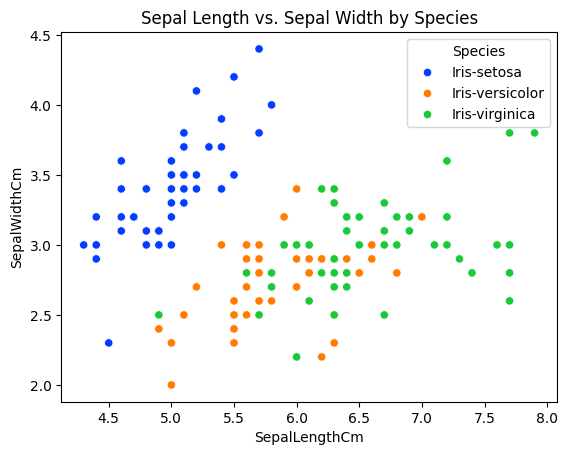

In [ ]:

sns.scatterplot(data=data, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='bright')
plt.title("Sepal Length vs. Sepal Width by Species")
plt.show()


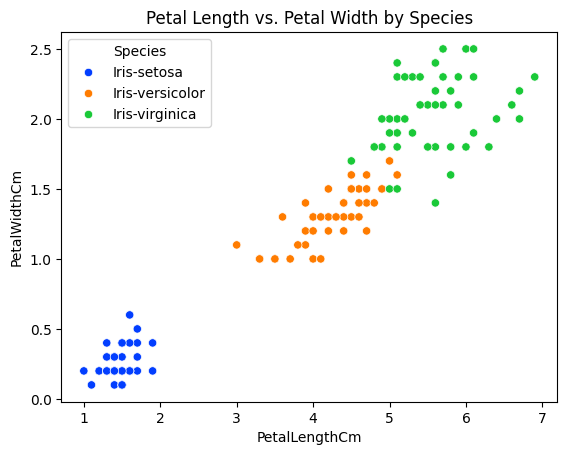

In [ ]:

sns.scatterplot(data=data, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette='bright')
plt.title("Petal Length vs. Petal Width by Species")
plt.show()


### PairPlot of Iris dataset

 * Each subplot represents a scatter plot between two features (e.g., Sepal Length vs. Sepal Width, Petal Length vs. Petal Width)
 * By observing the scatter plots, we can see how different species (classes) are distributed across different pairs of features.
 * This helps identify which pairs of features are more useful in distinguishing between species, which is important for Naive Bayes and other classification methods.

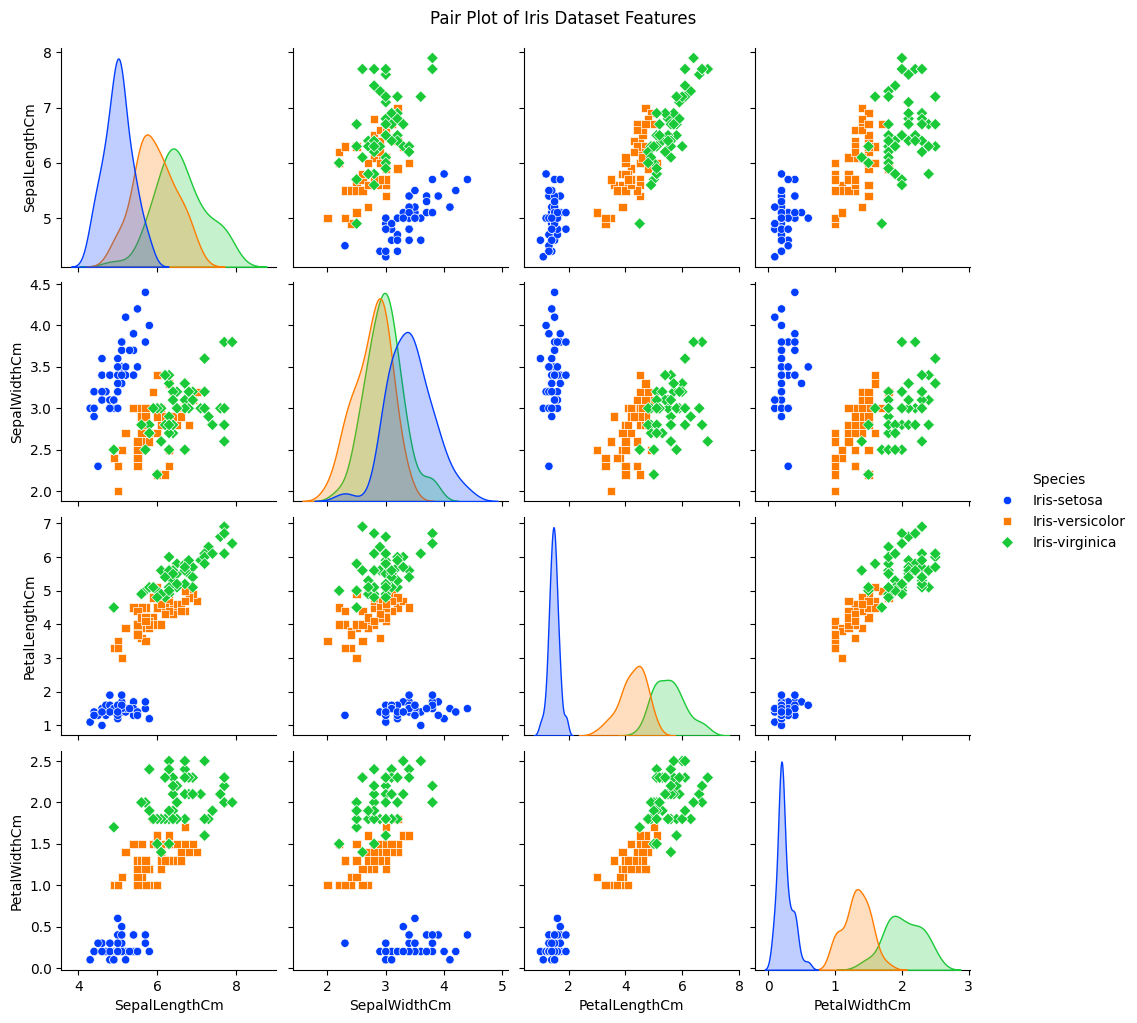

In [ ]:

sns.pairplot(data, hue='Species', palette='bright', markers=["o", "s", "D"])
plt.suptitle("Pair Plot of Iris Dataset Features", y=1.02)
plt.show()


###  Correlation Heatmap
* A correlation heatmap gives a numerical summary of feature correlations by calculating and visualizing the correlation coefficient (typically Pearson correlation)
* How to Interpret: In a heatmap, values closer to +1 or -1 indicate strong correlation, while values close to 0 suggest no correlation.
* In this heatmap:

  Values close to +1 indicate strong positive correlation.<br>
  Values close to -1 indicate strong negative correlation.<br>
  Values near 0 indicate weak or no correlation.

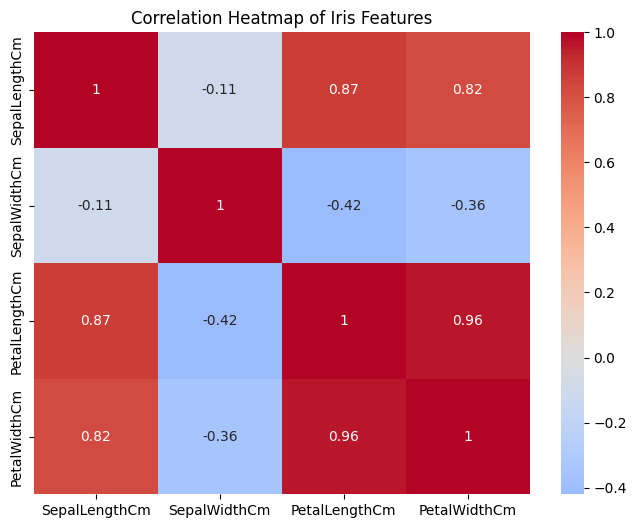

In [ ]:

corr_matrix = data.iloc[:, :-1].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Iris Features")
plt.show()


# Data Cleaning

## Missing Values

In [ ]:
data.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


## Check Duplicates


In [ ]:
duplicates = data[data.duplicated]
duplicates

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
35,4.9,3.1,1.5,0.1,Iris-setosa
38,4.9,3.1,1.5,0.1,Iris-setosa
143,5.8,2.7,5.1,1.9,Iris-virginica


## Drop Duplicates

In [ ]:
print(data.shape)
data.drop_duplicates(inplace=True)


(150, 5)


In [ ]:
print(data.shape)

(147, 5)


In [ ]:
columns = data.columns
columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [ ]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Extract Features and Label from the data Matrix


In [ ]:

X= data.iloc[:, :-1].to_numpy()

Y= np.array(data.iloc[:,-1])



In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [5. , 3

In [ ]:
Y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
    

# Split Data into Training and Testing

### Data is splitted into two Parts.
1. Training<br>
Training set is used to train model to make predictions. <br>
2. Testing<br>
Testing set is ued to Evaluate the Performance of model.

### How to Split Data into Training and Testing?

Generally, an 80-20 ratio is used to split data into training and testing sets. This ratio applies to the overall data as well as to each label's data in the dataset. This ratio could be different for very large datasets.

Let's try to urderstand it with an example.
Suppose, we have 100 points in a data matrix.
* 60 examples belongs to C1.
* 30 examples belongs to C2.
* 10 examples belongs to C3.
<br><br>
**Now, 80-20 ratios applies to all labesl's data.**
<br><br>
* 80% of 60 is 48, which goes to the training set, and the remaining 12 goes to the testing set.
* 80% of 30 is 24, which goes to the training set, and the remaining 6 goes to the testing set.
* 80% of 10 is 8, which goes to the training set, and the remaining 2 goes to the testing set.





In [ ]:
def splitData(X,Y,testPercentage= 0.2):
      trainPercentage = 1 - testPercentage
      Xtrain = []
      Ytrain = []
      Xtest = []
      Ytest = []

      labels , counts  = np.unique(Y,return_counts=True)

      for i in range(len(labels)):
        indices = np.where(Y == labels[i])
        Xt = X[indices]
        Yt = Y[indices]
        randomArray = np.arange(0,counts[i])
        np.random.shuffle(randomArray)
        Xtrain_indices_After_shuffling = randomArray[0:(round(trainPercentage * counts[i]))]
        Xtest_indices_After_shuffling = randomArray[(round(trainPercentage * counts[i])): counts[i]]
        Xtrain_shuffle = Xt[Xtrain_indices_After_shuffling]
        Xtest_shuffle =  Xt[Xtest_indices_After_shuffling]
        # print(type(Xtrain))
        print(Xtrain_shuffle)
        Xtrain.extend(Xtrain_shuffle)
        Ytrain.extend(Yt[Xtrain_indices_After_shuffling])
        Xtest.extend(Xtest_shuffle)
        Ytest.extend(Yt[Xtest_indices_After_shuffling])


      Xtrain = np.array(Xtrain)
      Ytrain = np.array(Ytrain)
      Xtest = np.array(Xtest)
      Ytest = np.array(Ytest)

      return Xtrain,Ytrain,Xtest,Ytest


In [ ]:
Xtrain,Ytrain,Xtest,Ytest = splitData(X,Y)
print (" Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape)
print (" Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytest.shape)
# Xtrain

[[5.4 3.9 1.3 0.4]
 [5.  3.4 1.6 0.4]
 [4.9 3.1 1.5 0.1]
 [4.7 3.2 1.3 0.2]
 [4.8 3.4 1.9 0.2]
 [5.  3.3 1.4 0.2]
 [4.5 2.3 1.3 0.3]
 [4.6 3.4 1.4 0.3]
 [4.8 3.4 1.6 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.7 1.5 0.2]
 [4.9 3.  1.4 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.4 3.9 1.7 0.4]
 [5.1 3.8 1.5 0.3]
 [5.2 4.1 1.5 0.1]
 [5.1 3.8 1.9 0.4]
 [5.2 3.4 1.4 0.2]
 [5.1 3.5 1.4 0.3]
 [5.4 3.4 1.5 0.4]
 [4.3 3.  1.1 0.1]
 [5.  3.5 1.3 0.3]
 [5.  3.5 1.6 0.6]
 [4.6 3.6 1.  0.2]
 [5.  3.  1.6 0.2]
 [5.2 3.5 1.5 0.2]
 [4.4 3.  1.3 0.2]
 [5.5 4.2 1.4 0.2]
 [5.5 3.5 1.3 0.2]
 [5.  3.4 1.5 0.2]
 [4.8 3.1 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [5.1 3.5 1.4 0.2]
 [5.1 3.3 1.7 0.5]
 [5.1 3.7 1.5 0.4]]
[[5.8 2.7 3.9 1.2]
 [6.2 2.9 4.3 1.3]
 [6.2 2.2 4.5 1.5]
 [5.7 2.6 3.5 1. ]
 [6.  3.4 4.5 1.6]
 [6.  2.2 4.  1. ]
 [6.4 3.2 4.5 1.5]
 [5.5 2.4 3.8 1.1]
 [6.8 2.8 4.8 1.4]
 [6.  2.7 5.1 1.6]
 [6.1 2.8 4.  1.3]
 [5.5 2.4 3.7 1. ]
 [5.1 2.5 3.  1.1]
 [5.7 2.8 4.1 1.3]
 [5.7 2.8 4

# Naive Bayes Algorithm

In [ ]:
# YOUR CODE HERE


class GaussianBayes:
    ''' Implements the Gaussian Bayes For Classification... '''
    def __init__(self):
        pass

    def Class_wise_division(self,X,Y):

        features = len(X[0])
        prior_prob = []
        Labels,counts = np.unique(Y,return_counts=True)
        no_of_classes = len(Labels)

        Classes = []

        for i in range (0,no_of_classes):

            prior_prob.append(counts[i]/len(Y))
            List = []
            Class_indexs = np.where(Y == Labels[i])
            List = X[Class_indexs]
            Classes.append(List)

        self.labels = Labels
        self.Classes = Classes
        self.prior_probability = prior_prob


    def train(self, X, Y):
        ''' Train the multiclass (or Binary) Bayes Rule using the given
            X [m x n] data matrix and Y labels matrix'''

        # YOUR CODE HERE
        self.Class_wise_division(X,Y)
        Mean = []
        std_dev = []

        for i in range(0,len(self.labels)):
            Mean.append(np.mean((np.array(self.Classes[i])),axis = 0))
            std_dev.append(np.std((np.array(self.Classes[i])),axis = 0))

        self.mean = Mean
        self.std = std_dev


    def test(self, X):

        ''' Run the trained classifiers on the given set of examples
            For each example, you should return probability and its assigned class
            Input: X of m x d
            Output:
            pclasses: predicted class of each example
            probability: probability of each example falling in that predicted class...
        '''


        nexamples, nfeatures=X.shape
        res=np.zeros((nexamples,len(self.labels)))
        pclasses=[0]*nexamples



        for i in range(0,len(self.labels)):


            likelihood = (1/(np.sqrt(2 * np.pi * (self.std[i] ** 2)))) * (np.exp(-1 * (((X - self.mean[i]) ** 2)/(2 * (self.std[i] **2)))))
            prob = likelihood[:,0]
            for j in range(1,nfeatures):
                prob = prob * likelihood[:,j]
            res[:,i] = prob * self.prior_probability[i]



        indexs = np.argmax(res,axis = 1)
        print(indexs)
        pclasses = self.labels[indexs]


        return np.array(pclasses), res

    def predict(self, X):
        return self.test(X)


# Model Trainig

In [ ]:
gb=GaussianBayes()
gb.train(Xtrain,Ytrain)

# Model Testing

In [ ]:
pclasses,res=gb.test(Xtest)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 1 1 1 2 2 2 1 2 2 2 2 2 2]


In [ ]:

print (pclasses==Ytest)
print (Ytest.shape[0])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True False
  True  True  True  True  True  True]
30


In [ ]:

print (np.sum(pclasses==Ytest))
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))


28
Accuracy =  0.9333333333333333
